In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1,inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import seaborn as sns

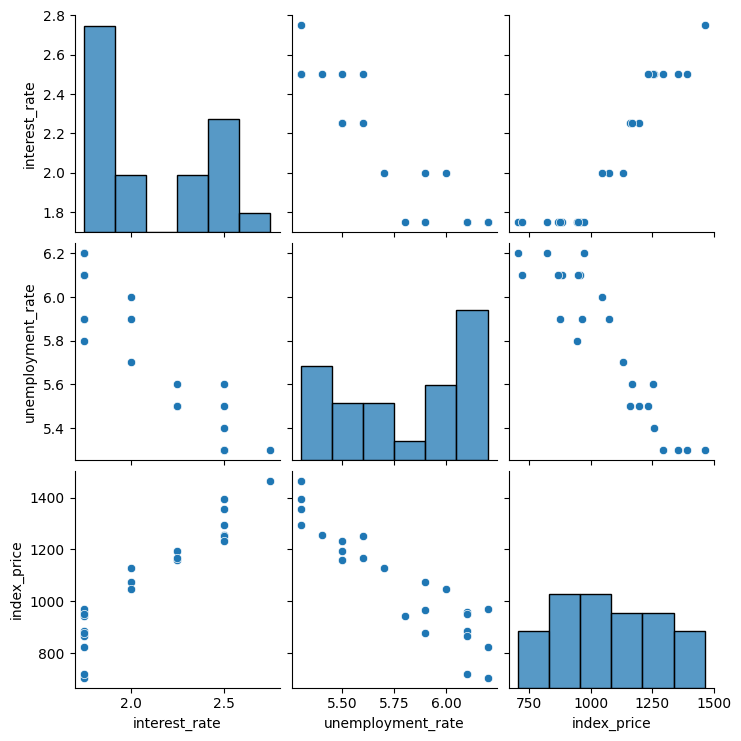

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'interest_rate')

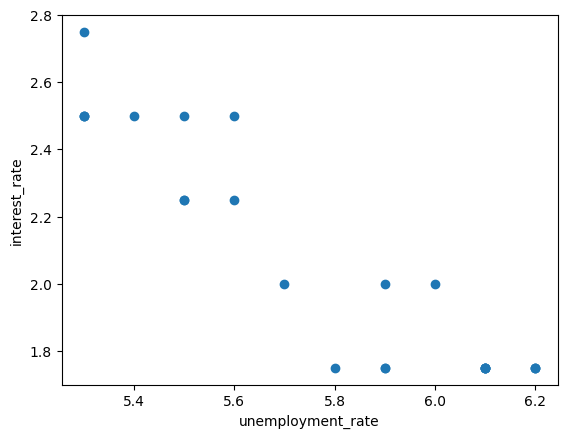

In [12]:
plt.scatter(df['unemployment_rate'],df['interest_rate'])
plt.xlabel("unemployment_rate")
plt.ylabel('interest_rate')

In [15]:
X = df[['unemployment_rate', 'interest_rate']]
y = df['index_price']


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler 

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train

array([[ 0.37908503, -0.90115511],
       [-1.48187786,  1.31077107],
       [ 1.30956648, -0.90115511],
       [-0.55139641,  1.31077107],
       [-1.48187786,  1.31077107],
       [ 0.68924552, -0.16384638],
       [ 0.999406  , -0.90115511],
       [-1.48187786,  1.31077107],
       [-1.17171738,  1.31077107],
       [ 1.30956648, -0.90115511],
       [ 0.999406  , -0.90115511],
       [ 0.37908503, -0.90115511],
       [ 0.999406  , -0.90115511],
       [-0.8615569 ,  0.57346234],
       [-0.24123593, -0.16384638],
       [ 0.06892455, -0.90115511],
       [ 0.999406  , -0.90115511],
       [-0.8615569 ,  1.31077107]])

In [27]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regression.predict(X_test)

y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [36]:
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

np.mean(validation_score)

-5914.828180162389

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(r2s)
print(rmse)

5793.762887712583
59.93578152323558
0.8278978091457141
76.11677139574815


# Assumptions

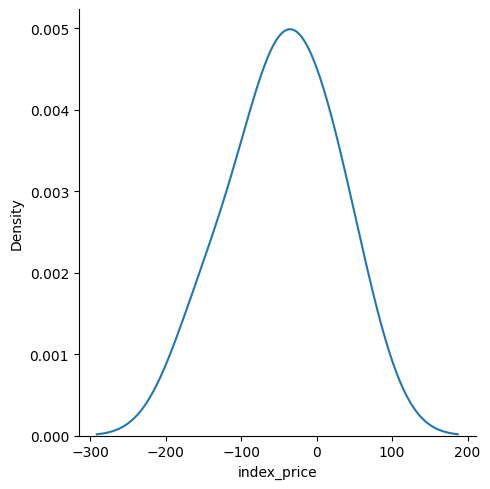

In [30]:
residuals = y_pred - y_test

sns.displot(residuals, kind='kde')

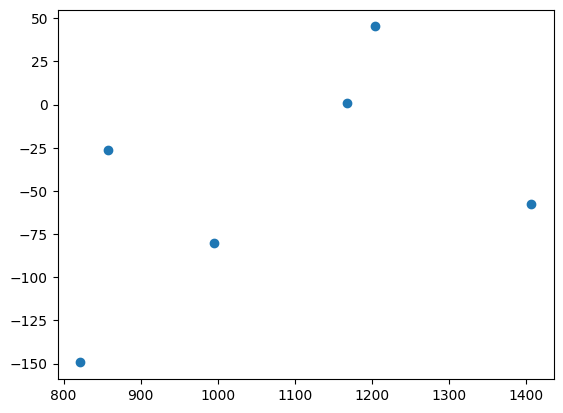

In [31]:
plt.scatter(y_pred, residuals)

In [33]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           2.50e-08
Time:                        21:29:56   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.4444     16.941     62.183      0.0

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [34]:
print(regression.coef_)

[-116.25716066   88.27275507]
